<br><br><br>

<center>
<h1>Facial Expression Recognition</h1>
<br>
<h3>Python Final Project</h3>
<h3>Li Ding</h3>
<h3>Yining Xu</h3>
<h3>Zhangqi Li</h3>
<h3>Menglin Cui</h3>
</center> 


<br><br><br>
___

# Introduction
The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

Facial Expression Recognition.csv contains three columns, "emotion", "pixels" and "Usage". 

The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. 

The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. 

The "Usage" column contains "Training", "PublicTest" and "PrivateTest". The training set consists of 28,709 examples. The public test set used for the leaderboard consists of 3,589 examples. The final test set, which was used to determine the winner of the competition, consists of another 3,589 examples.

This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project. They have graciously provided the workshop organizers with a preliminary version of their dataset to use for this contest.

# Data Import and Introduction

In [1]:
import pandas as pd
import numpy as np
from scipy import misc
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read raw data
df_raw = pd.read_csv('Facial Expression Recognition.csv')

In [3]:
df_raw.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [4]:
df_raw.shape

(35887, 3)

In [5]:
# split each pixel into a numpy array
pixels = np.zeros((df_raw.shape[0],48*48))
for i in range(df_raw.shape[0]):
    pixels[i] = df_raw.pixels[i].split()

In [7]:
# reshape the pixel into a 48*48 array
pixels_shaped = pixels.reshape((df_raw.shape[0],48, 48))

In [8]:
pixels_shaped[0]

array([[  70.,   80.,   82., ...,   52.,   43.,   41.],
       [  65.,   61.,   58., ...,   56.,   52.,   44.],
       [  50.,   43.,   54., ...,   49.,   56.,   47.],
       ..., 
       [  91.,   65.,   42., ...,   72.,   56.,   43.],
       [  77.,   82.,   79., ...,  105.,   70.,   46.],
       [  77.,   72.,   84., ...,  106.,  109.,   82.]])

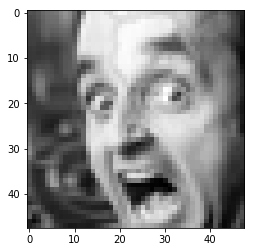

In [9]:
# display pixel array
plt.imshow(pixels_shaped[4131], cmap = 'gray')

# Image Display using Pillow

In [13]:
from PIL import Image as img
import random

In [14]:
list(np.where(df_raw.emotion == 0)[0])

[0,
 1,
 10,
 22,
 23,
 27,
 38,
 40,
 43,
 56,
 65,
 68,
 74,
 76,
 77,
 90,
 91,
 93,
 107,
 117,
 120,
 122,
 123,
 126,
 134,
 149,
 150,
 157,
 169,
 184,
 186,
 188,
 197,
 202,
 203,
 221,
 225,
 229,
 233,
 235,
 241,
 242,
 245,
 248,
 249,
 251,
 259,
 263,
 278,
 280,
 294,
 295,
 298,
 307,
 323,
 338,
 342,
 353,
 355,
 360,
 368,
 369,
 374,
 377,
 387,
 393,
 404,
 409,
 412,
 421,
 429,
 431,
 433,
 434,
 464,
 469,
 470,
 481,
 489,
 496,
 499,
 509,
 515,
 516,
 519,
 521,
 525,
 526,
 545,
 558,
 563,
 564,
 581,
 589,
 608,
 612,
 617,
 624,
 625,
 633,
 636,
 654,
 665,
 671,
 676,
 677,
 700,
 704,
 714,
 716,
 727,
 740,
 743,
 756,
 764,
 765,
 778,
 790,
 797,
 816,
 823,
 824,
 834,
 835,
 842,
 850,
 851,
 854,
 860,
 861,
 876,
 879,
 881,
 883,
 900,
 908,
 923,
 928,
 932,
 935,
 938,
 946,
 950,
 961,
 962,
 963,
 965,
 966,
 971,
 974,
 980,
 985,
 998,
 1015,
 1016,
 1018,
 1024,
 1039,
 1051,
 1061,
 1066,
 1071,
 1090,
 1098,
 1102,
 1105,
 1106,
 110

In [15]:
random.seed(1234)
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
for i in range(7):
    for j in range(7):
        index = random.choice(list(np.where(df_raw.emotion == i)[0]))
        name = emotions[i] + str(j) + '.jpg'
        misc.imsave(name, pixels_shaped[index])

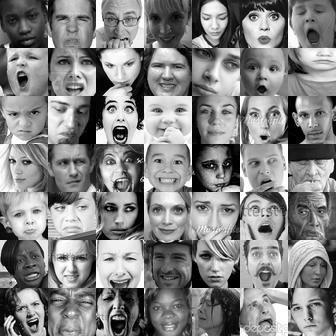

In [243]:
# display a 7*7 image matrix
# Each row consists of faces of the same expression: starting from the top row:
# Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral.
toImage = img.new('L',(48*7,48*7))
for i in range(7):
    for j in range(7):
        name = emotions[i] + str(j) + '.jpg'
        fromImage = img.open(name)
        loc = (i * 48, j * 48)
        # print(loc)
        toImage.paste(fromImage, loc)

toImage.save('merged.jpg')
toImage

# Principal Components Analysis

In [16]:
from sklearn.decomposition import PCA

In [17]:
# perform PCA on 48*48 pixels of each image and then extract the top 65 principal components
n_components = 65
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(pixels)

In [18]:
pixels_pca = pca.transform(pixels)

In [19]:
# the dimensions of each image have been reduced to 65
pixels_pca.shape

(35887, 65)

In [20]:
pixels_pca

array([[ 0.42373763, -0.4654515 , -0.92729785, ...,  1.37768056,
        -2.10651707, -1.46909358],
       [-0.03799422,  0.59112848,  0.60646527, ..., -0.31048572,
        -0.39014028,  0.28936932],
       [-0.81013148, -0.43746207, -2.0719665 , ..., -1.1052083 ,
        -0.52125293,  1.50568974],
       ..., 
       [-0.78968281, -1.48220161,  0.44131625, ..., -0.94797614,
         0.13047835,  0.58470598],
       [ 1.23027011, -0.13217725, -0.53945664, ..., -0.0396354 ,
         0.08119637, -0.31073654],
       [-0.12878363, -0.51200463, -0.62398053, ..., -0.60102225,
         0.23252207, -1.74558711]])

In [21]:
# convert array to dataframe
df_pca = pd.DataFrame(data = pixels_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.423738,-0.465451,-0.927298,0.547588,-0.963209,0.262006,0.238597,-0.123893,0.210355,0.409888,...,0.521210,0.086480,-1.148234,-0.350687,0.251272,-1.553024,0.619072,1.377681,-2.106517,-1.469094
1,-0.037994,0.591128,0.606465,0.638884,-1.292960,0.188229,1.091135,0.333948,-0.212891,0.515424,...,1.091522,0.346659,0.781071,1.258340,0.677515,-0.227593,-0.056854,-0.310486,-0.390140,0.289369
2,-0.810131,-0.437462,-2.071966,-0.377514,-1.527064,-1.953815,-2.473815,0.668640,-0.785264,-0.156645,...,2.100486,1.903366,-0.741485,-2.264902,0.546298,-0.066466,0.977261,-1.105208,-0.521253,1.505690
3,-0.142284,0.691139,1.520655,-1.982359,1.388033,-0.056599,-2.182340,-1.552036,-0.681352,-0.673146,...,2.904076,-0.442553,-0.102957,-0.950205,0.107761,-1.450153,1.932113,-1.135245,-1.170112,-0.211506
4,1.100513,-2.109911,0.327303,-0.024088,-0.657491,-1.423736,-0.113432,0.067392,0.874160,1.527901,...,1.260380,0.397973,1.227852,-0.333625,0.646369,-0.373142,-0.533617,-0.537747,0.981535,0.814537
5,0.133230,-0.488481,-0.298241,0.755595,-0.517615,0.667318,-0.436373,-1.121457,-0.732177,1.704197,...,0.508067,0.366649,1.325866,-0.909286,0.888556,0.751987,-0.092144,-0.290451,-1.011083,-0.381398
6,-0.251596,-1.179204,1.641202,0.350368,1.590188,0.273203,-1.546723,-0.675949,1.270251,0.207067,...,-0.133478,0.371490,0.051469,-0.416837,-0.343324,0.781518,0.974614,0.807097,0.716775,-0.362571
7,0.623140,-1.223674,-0.614793,-0.837643,1.354923,-0.012034,1.534647,2.695378,-0.273038,-0.401047,...,0.092103,0.442786,-0.226349,1.264310,-0.153595,0.229852,0.342737,0.836134,-0.055169,-1.313978
8,-0.993338,-2.126389,-1.168173,0.212581,0.035613,-0.151682,0.445081,-0.680369,-0.041180,-0.236544,...,1.220745,-0.782986,-0.940158,-0.401899,0.452885,-0.371505,0.236101,-0.346994,0.217853,0.253480
9,-1.270280,1.509150,0.570087,0.197534,-1.225634,-0.298641,0.152838,1.806222,0.193453,-0.212489,...,0.330989,1.170624,-0.643590,0.729458,-0.702153,0.219676,0.424930,-0.390758,1.148630,-0.664430


In [22]:
df_pca['emotion'] = df_raw['emotion']
df_pca['Usage'] = df_raw['Usage']
df_pca

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,emotion,Usage
0,0.423738,-0.465451,-0.927298,0.547588,-0.963209,0.262006,0.238597,-0.123893,0.210355,0.409888,...,-1.148234,-0.350687,0.251272,-1.553024,0.619072,1.377681,-2.106517,-1.469094,0,Training
1,-0.037994,0.591128,0.606465,0.638884,-1.292960,0.188229,1.091135,0.333948,-0.212891,0.515424,...,0.781071,1.258340,0.677515,-0.227593,-0.056854,-0.310486,-0.390140,0.289369,0,Training
2,-0.810131,-0.437462,-2.071966,-0.377514,-1.527064,-1.953815,-2.473815,0.668640,-0.785264,-0.156645,...,-0.741485,-2.264902,0.546298,-0.066466,0.977261,-1.105208,-0.521253,1.505690,2,Training
3,-0.142284,0.691139,1.520655,-1.982359,1.388033,-0.056599,-2.182340,-1.552036,-0.681352,-0.673146,...,-0.102957,-0.950205,0.107761,-1.450153,1.932113,-1.135245,-1.170112,-0.211506,4,Training
4,1.100513,-2.109911,0.327303,-0.024088,-0.657491,-1.423736,-0.113432,0.067392,0.874160,1.527901,...,1.227852,-0.333625,0.646369,-0.373142,-0.533617,-0.537747,0.981535,0.814537,6,Training
5,0.133230,-0.488481,-0.298241,0.755595,-0.517615,0.667318,-0.436373,-1.121457,-0.732177,1.704197,...,1.325866,-0.909286,0.888556,0.751987,-0.092144,-0.290451,-1.011083,-0.381398,2,Training
6,-0.251596,-1.179204,1.641202,0.350368,1.590188,0.273203,-1.546723,-0.675949,1.270251,0.207067,...,0.051469,-0.416837,-0.343324,0.781518,0.974614,0.807097,0.716775,-0.362571,4,Training
7,0.623140,-1.223674,-0.614793,-0.837643,1.354923,-0.012034,1.534647,2.695378,-0.273038,-0.401047,...,-0.226349,1.264310,-0.153595,0.229852,0.342737,0.836134,-0.055169,-1.313978,3,Training
8,-0.993338,-2.126389,-1.168173,0.212581,0.035613,-0.151682,0.445081,-0.680369,-0.041180,-0.236544,...,-0.940158,-0.401899,0.452885,-0.371505,0.236101,-0.346994,0.217853,0.253480,3,Training
9,-1.270280,1.509150,0.570087,0.197534,-1.225634,-0.298641,0.152838,1.806222,0.193453,-0.212489,...,-0.643590,0.729458,-0.702153,0.219676,0.424930,-0.390758,1.148630,-0.664430,2,Training


In [23]:
#get labels of features
X_labels = [c for c in df_pca.columns if c not in ['emotion','Usage']]
#divide into train, PublicTest and PrivateTest
train = df_pca[df_pca.Usage == 'Training']
publictest = df_pca[df_pca.Usage == 'PublicTest']
privatetest = df_pca[df_pca.Usage == 'PrivateTest']
#divide X and Y
X_train = train.ix[:,X_labels]
Y_train = train['emotion']
X_publictest = publictest.ix[:,X_labels]
Y_publictest = publictest['emotion']
X_privatetest = privatetest.ix[:,X_labels]
Y_privatetest = privatetest['emotion']

# Decision Tree

In [24]:
from sklearn import tree

In [48]:
# fit a decision tree
np.random.seed(1337) # for reproducibility
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [49]:
# make prediction
PublicPredict = clf.predict(X_publictest)
PrivatePredict = clf.predict(X_privatetest)

In [50]:
# compute test accuracy
PublicAccuracy = (PublicPredict == publictest['emotion']).sum() / 3589
PrivateAccuracy = (PrivatePredict == privatetest['emotion']).sum() / 3589
print('PublicTest accuracy:', PublicAccuracy)
print('PrivateTest accuracy:', PrivateAccuracy)
# store the test accuracy
Accuracy = []
Accuracy.append(('Decision Tree', PublicAccuracy, PrivateAccuracy))

PublicTest accuracy: 0.314015045974
PrivateTest accuracy: 0.301755363611


In [28]:
results = []
for d in range(1,10):
    for l in range(1,20,2):
        clf = tree.DecisionTreeClassifier(max_depth = d, min_samples_leaf = l)
        clf = clf.fit(X_train,Y_train)
        PublicPredict = clf.predict(X_publictest)
        PrivatePredict = clf.predict(X_privatetest)
        results.append((d, l, str((PublicPredict == publictest['emotion']).sum() / 3589)))
df_tree_accuracy = pd.DataFrame(data=results,columns=['depth', 'leaf', 'accuracy'])
df_tree_accuracy

,depth,leaf,accuracy
0,1,1,0.249373084425
1,1,3,0.249373084425
2,1,5,0.249373084425
3,1,7,0.249373084425
4,1,9,0.249373084425
5,1,11,0.249373084425
6,1,13,0.249373084425
7,1,15,0.249373084425
8,1,17,0.249373084425
9,1,19,0.249373084425


In [40]:
max(df_tree_accuracy.accuracy)

'0.307327946503'

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# build model
np.random.seed(1337) # for reproducibility
clf = RandomForestClassifier(max_features='sqrt', n_estimators=100, max_depth=100)
clf = clf.fit(X_train,Y_train)

In [52]:
# make prediction
PublicPredict = clf.predict(X_publictest)
PrivatePredict = clf.predict(X_privatetest)

In [53]:
# compute test accuracy
PublicAccuracy = (PublicPredict == publictest['emotion']).sum() / 3589
PrivateAccuracy = (PrivatePredict == privatetest['emotion']).sum() / 3589
print('PublicTest accuracy:', PublicAccuracy)
print('PrivateTest accuracy:', PrivateAccuracy)
# store the test accuracy
Accuracy.append(('Random Forest', PublicAccuracy, PrivateAccuracy))

PublicTest accuracy: 0.443577598217
PrivateTest accuracy: 0.444134856506


# Support Vector Machine (Multiclass)

In [55]:
from sklearn import svm

In [56]:
#build model using one versus one Multiclass linear SVC
np.random.seed(1337) # for reproducibility
clf = svm.SVC(kernel = 'linear', C = 1, decision_function_shape = 'ovo') # ovo: one versus one
clf = clf.fit(X = X_train, y = Y_train) 

In [57]:
# make prediction
PublicPredict = clf.predict(X_publictest)
PrivatePredict = clf.predict(X_privatetest)

In [58]:
# compute test accuracy
PublicAccuracy = (PublicPredict == publictest['emotion']).sum() / 3589
PrivateAccuracy = (PrivatePredict == privatetest['emotion']).sum() / 3589
print('PublicTest accuracy:', PublicAccuracy)
print('PrivateTest accuracy:', PrivateAccuracy)
# store the test accuracy
Accuracy.append(('SVM (Linear)', PublicAccuracy, PrivateAccuracy))

PublicTest accuracy: 0.382000557258
PrivateTest accuracy: 0.374477570354


In [59]:
#build model using one versus one Multiclass poly SVC
np.random.seed(1337) # for reproducibility
clf = svm.SVC(kernel = 'poly', C = 1, decision_function_shape = 'ovo') # ovo: one versus one
clf = clf.fit(X = X_train, y = Y_train) 

In [60]:
# make prediction
PublicPredict = clf.predict(X_publictest)
PrivatePredict = clf.predict(X_privatetest)

In [61]:
# compute test accuracy
PublicAccuracy = (PublicPredict == publictest['emotion']).sum() / 3589
PrivateAccuracy = (PrivatePredict == privatetest['emotion']).sum() / 3589
print('PublicTest accuracy:', PublicAccuracy)
print('PrivateTest accuracy:', PrivateAccuracy)
# store the test accuracy
Accuracy.append(('SVM (Poly)', PublicAccuracy, PrivateAccuracy))

PublicTest accuracy: 0.427974366119
PrivateTest accuracy: 0.41961549178


# Convolutional neural network

In [10]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [11]:
# split df_raw in training, publictest, and privatetest
df_train = df_raw[df_raw.Usage == 'Training']
df_publictest = df_raw[df_raw.Usage == 'PublicTest']
df_privatetest = df_raw[df_raw.Usage == 'PrivateTest']

In [12]:
# create an array for training dataframe
Xtrain = np.zeros((df_train.shape[0],48*48))
for i in range(df_train.shape[0]):
    Xtrain[i] = df_train.pixels[i].split()
Xtrain = Xtrain.reshape((df_train.shape[0],48, 48))
Ytrain = np.array(df_train.emotion)

In [13]:
# create an array for publictest dataframe
Xpublictest = np.zeros((df_publictest.shape[0],48*48))
for i in range(df_publictest.index[0], df_publictest.index[0] + df_publictest.shape[0]):
    Xpublictest[i - df_publictest.index[0]] = df_publictest.pixels[i].split()
Xpublictest = Xpublictest.reshape((df_publictest.shape[0],48, 48))
Ypublictest = np.array(df_publictest.emotion)

In [14]:
# create an array for privatetest dataframe
Xprivatetest = np.zeros((df_privatetest.shape[0],48*48))
for i in range(df_privatetest.index[0], df_privatetest.index[0] + df_privatetest.shape[0]):
    Xprivatetest[i - df_privatetest.index[0]] = df_privatetest.pixels[i].split()
Xprivatetest = Xprivatetest.reshape((df_privatetest.shape[0],48, 48))
Yprivatetest = np.array(df_privatetest.emotion)

In [15]:
batch_size = 128
nb_classes = 7
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 48, 48
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

#Add the depth in the input. Only grayscale so depth is only one
if K.image_dim_ordering() == 'th':
    Xtrain = Xtrain.reshape(Xtrain.shape[0], 1, img_rows, img_cols)
    Xpublictest = Xpublictest.reshape(Xpublictest.shape[0], 1, img_rows, img_cols)
    Xprivatetest = Xprivate.reshape(Xprivatetest.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    Xtrain = Xtrain.reshape(Xtrain.shape[0], img_rows, img_cols, 1)
    Xpublictest = Xpublictest.reshape(Xpublictest.shape[0], img_rows, img_cols, 1)
    Xprivatetest = Xprivatetest.reshape(Xprivatetest.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Make the value floats in [0,1] instead of int in [0,255]
Xtrain = Xtrain.astype('float32')
Xpublictest = Xpublictest.astype('float32')
Xprivatetest = Xprivatetest.astype('float32')
Xtrain /= 255
Xpublictest /= 255
Xprivatetest /= 255
print('X_train shape:', Xtrain.shape)
print(Xtrain.shape[0], 'Training samples')
print(Xpublictest.shape[0], 'PublicTest samples')
print(Xprivatetest.shape[0], 'PrivateTest samples')

X_train shape: (28709, 48, 48, 1)
28709 Training samples
3589 PublicTest samples
3589 PrivateTest samples


In [16]:
# convert class vectors to binary class matrices
Ytrain = np_utils.to_categorical(Ytrain, nb_classes)
Ypublictest = np_utils.to_categorical(Ypublictest, nb_classes)
Yprivatetest = np_utils.to_categorical(Yprivatetest, nb_classes)
Ytrain

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [340]:
# build the model
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [341]:
# fit the model and compute accuracy using PublicTest dataset
np.random.seed(1337) # for reproducibility
model.fit(Xtrain, Ytrain, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(Xpublictest, Ypublictest))
score = model.evaluate(Xpublictest, Ypublictest, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
PublicAccuracy = score[1]

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 319s - loss: 1.7534 - acc: 0.2924 - val_loss: 1.6021 - val_acc: 0.3803

In [343]:
# build the model
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [344]:
# fit the model and compute accuracy using PrivateTest dataset
np.random.seed(1337) # for reproducibility
model.fit(Xtrain, Ytrain, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(Xprivatetest, Yprivatetest))
score = model.evaluate(Xprivatetest, Yprivatetest, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
# store the test accuracy
PrivateAccuracy = score[1]
Accuracy.append(('Convolutional Neural Network', PublicAccuracy, PrivateAccuracy))

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 379s - loss: 1.7562 - acc: 0.2904 - val_loss: 1.6365 - val_acc: 0.3631

# Compare Accuracy of Models

In [65]:
df_accuracy = pd.DataFrame(data=Accuracy,columns=['Model', 'PublicAccuracy', 'PrivateAccuracy'])

In [66]:
df_accuracy

,Model,PublicAccuracy,PrivateAccuracy
0,Decision Tree,0.314015,0.301755
1,Random Forest,0.443578,0.444135
2,SVM (Linear),0.382001,0.374478
3,SVM (Poly),0.427974,0.419615
4,Convolutional Neural Network,0.505155,0.509334


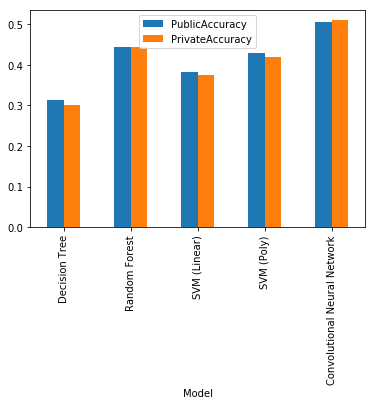

In [68]:
df_accuracy.plot(x = df_accuracy['Model'], kind = 'bar')

# Done :)